## Importando bibliotecas

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Inicialização das variáveis do problema de advecção

In [3]:
# Spatial discretization
L = 10.0                                      # Domain length
n = 101                                       # Number of points
dx = L/(n-1)                                  # Length of spacing
x = np.linspace(0,L,n)                        # Node Positions

# Time discretization
nt = 10                                       # Number of time steps
dt = 0.1                                      # Time step

# Wave equation parameters
a = 0.5                                       # Velocity coefficient

# Initial conditions
f = np.zeros((n,1))                           # Wave function (Initialization)
f[40:60] = 1.0                                # Wave square pulse
fi = np.copy(f)                               # Initial f

## Perfil inicial da função f

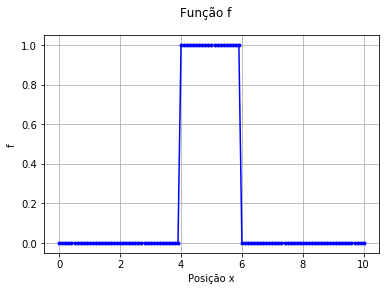

In [4]:
plt.plot(x,f,'.-b')
plt.suptitle('Função f')
plt.xlabel('Posição x')
plt.ylabel('f')
plt.grid()
plt.show()

## Solução da equação com Upwind

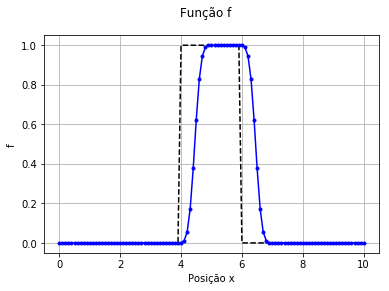

In [5]:
# Time loop
for k in range(0,nt):
    fo = np.copy(f)
    for i in range(1,n-1):
        f[i] = fo[i] - (a*dt/dx)*(fo[i]-fo[i-1])
    f[0] = fo[n-1]
    
plt.plot(x,fi,'--k',x,f,'.-b')
plt.suptitle('Função f')
plt.xlabel('Posição x')
plt.ylabel('f')
plt.grid()

plt.show()

## Matriz com respostas do upwind

Criação de uma matriz com valores para, $\Delta t$, $\Delta x$, a, $f^{n}_{i}$ e $f^{n}_{i-1}$ e o valor correspondente de $f^{n+1}_{i}$ obtido com a equação da discrtização upwind 

$$ f^{n+1}_{i} =  f^{n}_{i} - a \frac{\Delta t}{\Delta x} ( f^{n}_{i} - f^{n}_{i-1} ) $$

$$ f^{n+1}_{i} =  \sigma ( f^{n}_{i}, f^{n}_{i-1}, a, \Delta t, \Delta x )$$

Queremos aqui aproximar a função $\sigma$ usando uma rede neural

In [6]:
nc = 10*10*10*10*10                             # Número de combinações com 10 Valores para cada variável
nv = 5                                          # Número de variáveis
M = np.zeros((nc,5))                            # Matriz com as combinações entre as variáveis
fu = np.zeros((nc,1))                           # Resultado da função sigma da discretização upwind

v_fcell = np.linspace(0,2,10)
v_fback = np.linspace(0,2,10)
v_a = np.linspace(0,2,10)
v_dt = np.linspace(0,2,10)
v_dx = np.linspace(0.05,2,10)

s = 0
for i in range(0,10):
    for j in range(0,10):
        for k in range(0,10):
            for l in range(0,10):
                for m in range(0,10):
                    M[s,0] = v_fcell[i]
                    M[s,1] = v_fback[j]
                    M[s,2] = v_a[k]
                    M[s,3] = v_dt[l]
                    M[s,4] = v_dx[m]
                    fu[s] = M[s,0] - (M[s,2]*M[s,3]/M[s,4])*(M[s,0]-M[s,1])
                    s = s + 1

## Inicialização das variáveis da rede neural

In [7]:
x = tf.placeholder(tf.float32, [None, n])
W = tf.Variable(tf.zeros([n, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

## Treinando a rede neural com as respostas do upwind